### Your name:

<pre> Siqi Liu </pre>

### Collaborators:

<pre> Enter the name of the people you worked with if any</pre>


In [1]:
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(123)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

### Dimesionality Reduction

Q. How can you evaluate the performance of a dimensionality reduction algorithm on your dataset?

By looking at how much variance is explained by the algorithm

Q. Can PCA be used to reduce the dimensionality of a highly nonlinear dataset?

Yes

Q. What is the curse of dimensionality?

The presence of too many features makes training extremely slow, and unable to produce a good model. Many reasons:
- With many dimensions, points are more likely to be close to border
- More dimensionality leads to higher risk of overfitting
- More dimensionality requires higher training instances to reach sufficient density

## Follow the best practices for organizing your code (remember chapter 2)

    
Q. Use t-SNE to reduce the Wine Quality Data Set (White Wine) [WineData](https://archive.ics.uci.edu/ml/datasets/Wine+Quality) dataset down to two dimensions and plot the result using Matplotlib. You can use a scatterplot using different colors for each quality to represent each data point target class. 

# Load Data

In [2]:
data = pd.read_csv("data/winequality-white.csv", sep = ';', header = 0)

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
data.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.855,0.844,3.800,6.300,6.800,7.300,14.200
volatile acidity,4898.0,0.278,0.101,0.080,0.210,0.260,0.320,1.100
citric acid,4898.0,0.334,0.121,0.000,0.270,0.320,0.390,1.660
residual sugar,4898.0,6.391,5.072,0.600,1.700,5.200,9.900,65.800
chlorides,4898.0,0.046,0.022,0.009,0.036,0.043,0.050,0.346
free sulfur dioxide,4898.0,35.308,17.007,2.000,23.000,34.000,46.000,289.000
total sulfur dioxide,4898.0,138.361,42.498,9.000,108.000,134.000,167.000,440.000
density,4898.0,0.994,0.003,0.987,0.992,0.994,0.996,1.039
pH,4898.0,3.188,0.151,2.720,3.090,3.180,3.280,3.820
sulphates,4898.0,0.490,0.114,0.220,0.410,0.470,0.550,1.080


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
y = data['quality'].copy()
X = data.drop(columns=['quality']).copy()

In [7]:
y.shape

(4898,)

In [8]:
y.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [9]:
X.shape

(4898, 11)

In [10]:
# Normalize X
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_norm = sc.fit_transform(X)

# t-SNE

In [12]:
import time

In [13]:
from sklearn.manifold import TSNE

t0 = time.time()
tsne = TSNE(n_components = 2, random_state = 42, verbose = 2)
X_reduced_tsne = tsne.fit_transform(X_norm)
t1 = time.time()

print("t-SNE took {:.2f}s".format(t1 - t0))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 4898 samples in 0.002s...
[t-SNE] Computed neighbors for 4898 samples in 0.419s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4898
[t-SNE] Computed conditional probabilities for sample 2000 / 4898
[t-SNE] Computed conditional probabilities for sample 3000 / 4898
[t-SNE] Computed conditional probabilities for sample 4000 / 4898
[t-SNE] Computed conditional probabilities for sample 4898 / 4898
[t-SNE] Mean sigma: 0.819836
[t-SNE] Computed conditional probabilities in 0.096s
[t-SNE] Iteration 50: error = 88.8467255, gradient norm = 0.0058086 (50 iterations in 2.376s)
[t-SNE] Iteration 100: error = 84.3182068, gradient norm = 0.0022530 (50 iterations in 2.004s)
[t-SNE] Iteration 150: error = 84.1878357, gradient norm = 0.0007037 (50 iterations in 1.753s)
[t-SNE] Iteration 200: error = 84.0572433, gradient norm = 0.0002547 (50 iterations in 1.816s)
[t-SNE] Iteration 250: error = 84.0331421, gradient norm = 0.0000412

In [14]:
X_reduced_tsne.shape

(4898, 2)

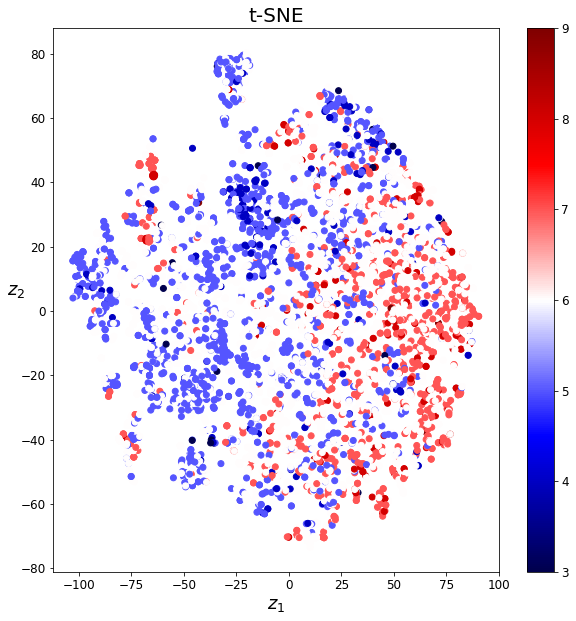

In [15]:
plt.figure(figsize=(10,10))
plt.title('t-SNE', fontsize=20)
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=y, cmap="seismic")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.colorbar()
plt.show()

- Use other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.

# PCA, LLE, MDS and Isomap

In [17]:
from sklearn.decomposition import PCA

t0 = time.time()
pca = PCA(n_components=2, random_state=42)
X_reduced_pca = pca.fit_transform(X_norm)
t1 = time.time()

print("PCA took {:.2f}s".format(t1 - t0))

PCA took 0.02s


In [19]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_reduced_lle = lle.fit_transform(X_norm)
t1 = time.time()

print("LLE took {:.2f}s".format(t1 - t0))

LLE took 1.92s


In [20]:
from sklearn.manifold import MDS

t0 = time.time()
mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X_norm)
t1 = time.time()

print("MDS took {:.2f}s".format(t1 - t0))

MDS took 924.61s


In [21]:
from sklearn.manifold import Isomap

t0 = time.time()
isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X_norm)
t1 = time.time()

print("Isomap took {:.2f}s".format(t1 - t0))

Isomap took 10.20s


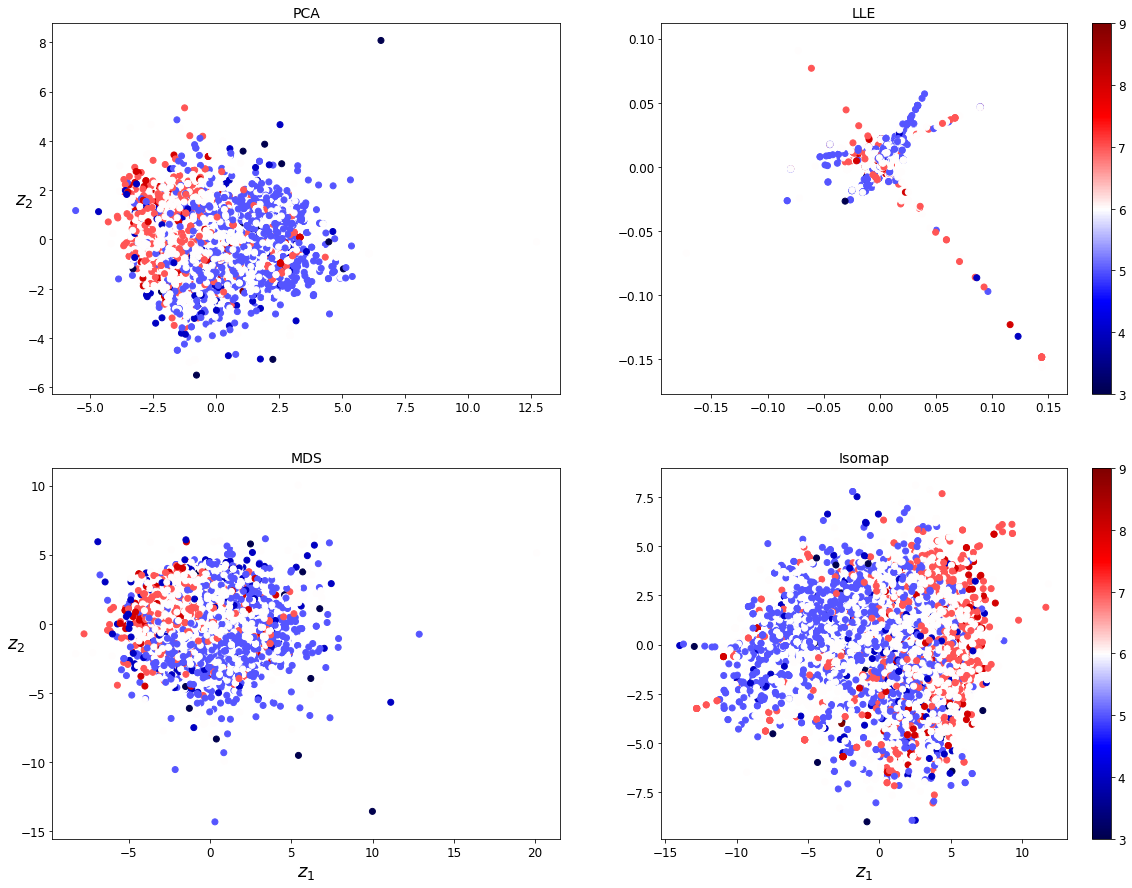

In [22]:
titles = ["PCA", "LLE", "MDS", "Isomap"]

plt.figure(figsize=(20, 15))

for subplot, title, X_reduced in zip((221, 222, 223, 224), titles,
                                     (X_reduced_pca, X_reduced_lle, X_reduced_mds, X_reduced_isomap)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="seismic")
    if subplot in [223, 224]:
        plt.xlabel("$z_1$", fontsize=18)
    if subplot in [221, 223]:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    if subplot in [222, 224]:
        plt.colorbar()
plt.show()

- LLE does not perform well
- Isomap performs sub-optimal
- Both PCA and MDS perform well. PCA takes much less time

-  Train a tune Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. (It's up to you to define the data split). Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?


# Train/Test Split

In [23]:
from sklearn.model_selection import train_test_split

tr, te = train_test_split(data, test_size=0.2, random_state=42)

tr = tr.copy()
te = te.copy()

In [24]:
tr_y = tr['quality'].copy()
tr_X = tr.drop('quality', axis = 1)

In [25]:
tr_y.value_counts()

6    1766
5    1166
7     688
8     140
4     138
3      15
9       5
Name: quality, dtype: int64

In [26]:
tr_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4665,7.3,0.17,0.36,8.20,0.028,44.0,111.0,0.99272,3.14,0.41,12.4
1943,6.3,0.25,0.44,11.60,0.041,48.0,195.0,0.99680,3.18,0.52,9.5
3399,5.6,0.32,0.33,7.40,0.037,25.0,95.0,0.99268,3.25,0.49,11.1
843,6.9,0.19,0.35,1.70,0.036,33.0,101.0,0.99315,3.21,0.54,10.8
2580,7.7,0.30,0.26,18.95,0.053,36.0,174.0,0.99976,3.20,0.50,10.4


In [27]:
te_y = te['quality'].copy()
te_X = te.drop('quality', axis = 1)

In [28]:
te_y.value_counts()

6    432
5    291
7    192
8     35
4     25
3      5
Name: quality, dtype: int64

In [29]:
te_X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4656,6.0,0.29,0.41,10.8,0.048,55.0,149.0,0.99370,3.09,0.59,10.966667
3659,5.4,0.53,0.16,2.7,0.036,34.0,128.0,0.98856,3.20,0.53,13.200000
907,7.1,0.25,0.39,2.1,0.036,30.0,124.0,0.99080,3.28,0.43,12.200000
4352,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.700000
3271,6.5,0.32,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,12.000000


- There are no categorical columns
- Since we will be doing PCA, need to normalize first

# Normalization

In [30]:
sc = StandardScaler()
tr_X = sc.fit_transform(tr_X)

In [31]:
te_X = sc.transform(te_X)

# Random Forest Classifier - Native

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc = RandomForestClassifier(random_state = 42)

In [34]:
t0 = time.time()
rfc.fit(tr_X, tr_y)
t1 = time.time()

print("Native training took {:.2f}s".format(t1 - t0))

Native training took 0.06s


/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [36]:
confusion_matrix(tr_y, rfc.predict(tr_X))

array([[  13,    0,    1,    1,    0,    0,    0],
       [   0,  137,    1,    0,    0,    0,    0],
       [   0,    1, 1157,    7,    1,    0,    0],
       [   0,    1,   10, 1753,    2,    0,    0],
       [   0,    0,    2,   17,  669,    0,    0],
       [   0,    0,    0,    5,    3,  132,    0],
       [   0,    0,    0,    0,    1,    0,    4]])

In [37]:
rfc.score(tr_X, tr_y)

0.9864726901480347

In [38]:
confusion_matrix(te_y, rfc.predict(te_X))

array([[  0,   0,   4,   1,   0,   0],
       [  0,   4,  14,   7,   0,   0],
       [  0,  10, 188,  84,   9,   0],
       [  0,   0,  90, 313,  29,   0],
       [  0,   0,   4,  74, 109,   5],
       [  0,   0,   2,  11,   7,  15]])

In [39]:
rfc.score(te_X, te_y)

0.6418367346938776

# Random Forest Classifier - PCA Reduced

In [40]:
pca = PCA(n_components = 0.95, random_state = 42)
tr_X_pca = pca.fit_transform(tr_X)

In [41]:
tr_X_pca.shape

(3918, 9)

In [42]:
np.sum(pca.explained_variance_ratio_)

0.9716287630585742

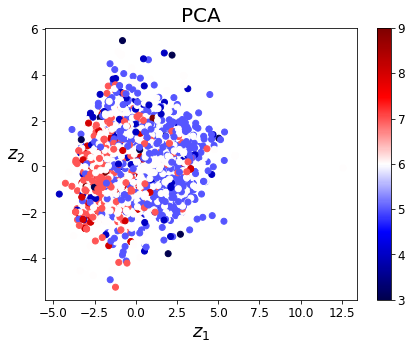

In [43]:
plt.figure(figsize=(7,5))
plt.title('PCA', fontsize=20)
plt.scatter(tr_X_pca[:, 0], tr_X_pca[:, 1], c=tr_y, cmap="seismic")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.colorbar()
plt.show()

In [44]:
rfc_pca = RandomForestClassifier(random_state = 42)

In [45]:
import time
t0 = time.time()
rfc_pca.fit(tr_X_pca, tr_y)
t1 = time.time()

print("PCA reduced training took {:.2f}s".format(t1 - t0))

PCA reduced training took 0.08s


/anaconda3/envs/py37/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
confusion_matrix(tr_y, rfc_pca.predict(tr_X_pca))

array([[  14,    0,    1,    0,    0,    0,    0],
       [   0,  135,    2,    1,    0,    0,    0],
       [   0,    0, 1158,    6,    2,    0,    0],
       [   0,    1,    6, 1756,    3,    0,    0],
       [   0,    0,    1,   23,  664,    0,    0],
       [   0,    0,    0,    3,    1,  136,    0],
       [   0,    0,    0,    0,    2,    0,    3]])

In [47]:
rfc_pca.score(tr_X_pca, tr_y)

0.9867279224093926

In [48]:
te_X_pca = pca.transform(te_X)
confusion_matrix(te_y, rfc_pca.predict(te_X_pca))

array([[  0,   0,   4,   1,   0,   0],
       [  1,   3,  13,   6,   2,   0],
       [  0,   8, 200,  75,   8,   0],
       [  0,   1,  81, 308,  41,   1],
       [  0,   0,  12,  73, 105,   2],
       [  0,   0,   1,  10,   9,  15]])

In [49]:
rfc_pca.score(te_X_pca, te_y)

0.6438775510204081

Runtime not really affected, accuracy increased by a little bit

[Optional] Read
https://marckhoury.github.io/counterintuitive-properties-of-high-dimensional-space/

Summary of your most interesting findings